# Learning Rate Schedule & Adaptive Gradient Descent Algorithm <br>
A CNN model is constructed to train on CIFAR-10

The following learning rate decay schedules are used : constant learning rate, time-based decay, step decay, exponential decay

The following adaptive graident descent algorithms are used : Adagrad, Adadelta, RMSProp, Adam

Model performance of using different learning rate schedules or adaptive gradient descent algorithms are compared

In [16]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

# SectionLoad CIFAR-10 data

In [17]:
batch_size = 64
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.np_utils.to_categorical(np.ravel(y_test), num_classes)

X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


# New SectionDefine function to construct CNN model

In [18]:
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # print(model.summary())
    return(model)

# Define function to plot model accuracy

In [22]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    
    plt.close(fig)

# Constant learning rate

In [13]:
# define CNN model
model1 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history1 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))



Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 - 8s - loss: 0.6907 - accuracy: 0.5240 - val_loss: 0.6934 - val_accuracy: 0.5050 - 8s/epoch - 51ms/step
Epoch 2/100
157/157 - 8s - loss: 0.6845 - accuracy: 0.5555 - val_loss: 0.6687 - val_accuracy: 0.6050 - 8s/epoch - 50ms/step
Epoch 3/100
157/157 - 7s - loss: 0.6750 - accuracy: 0.5821 - val_loss: 0.6550 - val_accuracy: 0.6105 - 7s/epoch - 46ms/step
Epoch 4/100
157/157 - 7s - loss: 0.6665 - accuracy: 0.5973 - val_loss: 0.6496 - val_accuracy: 0.6260 - 7s/epoch - 45ms/step
Epoch 5/100
157/157 - 9s - loss: 0.6577 - accuracy: 0.6085 - val_loss: 0.6499 - val_accuracy: 0.6060 - 9s/epoch - 54ms/step
Epoch 6/100
157/157 - 7s - loss: 0.6494 - accuracy: 0.6250 - val_loss: 0.6279 - val_accuracy: 0.6490 - 7s/epoch - 47ms/step
Epoch 7/100
157/157 - 7s - loss: 0.6381 - accuracy: 0.6335 - val_loss: 0.6316 - val_accuracy: 0.6410 - 7s/epoch - 47ms/step
Epoch 8/100
157/157 - 7s - loss: 0.6328 - accuracy: 0.6382 - val_loss: 0.6187 - val_accuracy: 0.6640 - 7s/epoch - 47ms/step
Epoch 9/100
157/157 

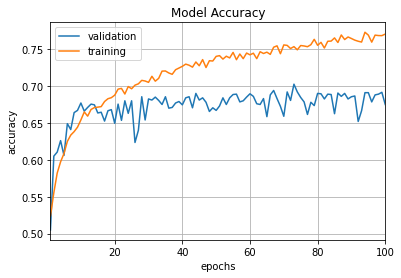

In [23]:
# plot model accuracy
plot_fig(1, history1)

# Time-based decay

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


157/157 - 9s - loss: 0.6940 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.4980 - 9s/epoch - 57ms/step
Epoch 2/100
157/157 - 7s - loss: 0.6930 - accuracy: 0.5081 - val_loss: 0.6920 - val_accuracy: 0.5240 - 7s/epoch - 46ms/step
Epoch 3/100
157/157 - 7s - loss: 0.6900 - accuracy: 0.5353 - val_loss: 0.6895 - val_accuracy: 0.5175 - 7s/epoch - 46ms/step
Epoch 4/100
157/157 - 7s - loss: 0.6819 - accuracy: 0.5630 - val_loss: 0.6712 - val_accuracy: 0.5945 - 7s/epoch - 46ms/step
Epoch 5/100
157/157 - 7s - loss: 0.6761 - accuracy: 0.5768 - val_loss: 0.6627 - val_accuracy: 0.5985 - 7s/epoch - 46ms/step
Epoch 6/100
157/157 - 7s - loss: 0.6682 - accuracy: 0.5858 - val_loss: 0.6633 - val_accuracy: 0.6150 - 7s/epoch - 45ms/step
Epoch 7/100
157/157 - 7s - loss: 0.6673 - accuracy: 0.5947 - val_loss: 0.6573 - val_accuracy: 0.6230 - 7s/epoch - 45ms/step
Epoch 8/100
157/157 - 7s - loss: 0.6604 - accuracy: 0.5973 - val_loss: 0.6501 - val_accuracy: 0.6320 - 7s/epoch - 45ms/step
Epoch 9/100
157/157 

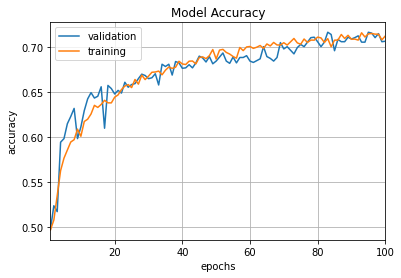

In [24]:
# define CNN model
model2 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2, 
                     validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(2, history2)

# Step decay

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


lr: 0.1
157/157 - 8s - loss: 0.6923 - accuracy: 0.5199 - val_loss: 0.6786 - val_accuracy: 0.5600 - lr: 0.1000 - 8s/epoch - 51ms/step
Epoch 2/100
lr: 0.1
157/157 - 7s - loss: 0.6819 - accuracy: 0.5676 - val_loss: 0.6680 - val_accuracy: 0.6095 - lr: 0.1000 - 7s/epoch - 44ms/step
Epoch 3/100
lr: 0.1
157/157 - 10s - loss: 0.6758 - accuracy: 0.5756 - val_loss: 0.6838 - val_accuracy: 0.5760 - lr: 0.1000 - 10s/epoch - 61ms/step
Epoch 4/100
lr: 0.1
157/157 - 7s - loss: 0.6726 - accuracy: 0.5937 - val_loss: 0.6588 - val_accuracy: 0.5895 - lr: 0.1000 - 7s/epoch - 45ms/step
Epoch 5/100
lr: 0.1
157/157 - 7s - loss: 0.6655 - accuracy: 0.5936 - val_loss: 0.6735 - val_accuracy: 0.5740 - lr: 0.1000 - 7s/epoch - 44ms/step
Epoch 6/100
lr: 0.1
157/157 - 10s - loss: 0.6653 - accuracy: 0.5942 - val_loss: 0.6515 - val_accuracy: 0.6205 - lr: 0.1000 - 10s/epoch - 62ms/step
Epoch 7/100
lr: 0.1
157/157 - 7s - loss: 0.6545 - accuracy: 0.6141 - val_loss: 0.6400 - val_accuracy: 0.6325 - lr: 0.1000 - 7s/epoch - 44m

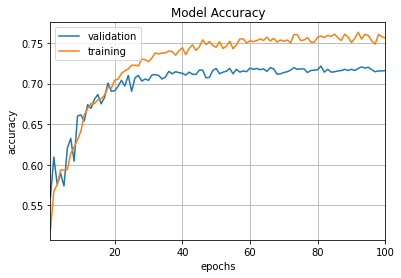

In [25]:
# define CNN model
model3 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=2)

# plot model accuracy
plot_fig(3, history3)

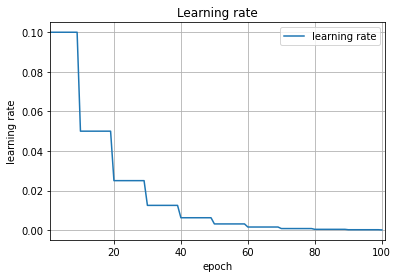

In [26]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()

plt.close(fig)

# Exponential decay

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


lr: 0.09048374180359596
157/157 - 7s - loss: 0.6927 - accuracy: 0.5205 - val_loss: 0.6859 - val_accuracy: 0.5210 - lr: 0.1000 - 7s/epoch - 48ms/step
Epoch 2/100
lr: 0.0818730753077982
157/157 - 7s - loss: 0.6861 - accuracy: 0.5397 - val_loss: 0.6932 - val_accuracy: 0.5005 - lr: 0.0905 - 7s/epoch - 43ms/step
Epoch 3/100
lr: 0.0740818220681718
157/157 - 7s - loss: 0.6803 - accuracy: 0.5590 - val_loss: 0.6626 - val_accuracy: 0.6010 - lr: 0.0819 - 7s/epoch - 43ms/step
Epoch 4/100
lr: 0.06703200460356394
157/157 - 7s - loss: 0.6711 - accuracy: 0.5845 - val_loss: 0.6556 - val_accuracy: 0.6105 - lr: 0.0741 - 7s/epoch - 43ms/step
Epoch 5/100
lr: 0.06065306597126335
157/157 - 7s - loss: 0.6621 - accuracy: 0.5999 - val_loss: 0.6470 - val_accuracy: 0.6180 - lr: 0.0670 - 7s/epoch - 43ms/step
Epoch 6/100
lr: 0.05488116360940264
157/157 - 7s - loss: 0.6578 - accuracy: 0.6096 - val_loss: 0.6411 - val_accuracy: 0.6245 - lr: 0.0607 - 7s/epoch - 43ms/step
Epoch 7/100
lr: 0.04965853037914095
157/157 - 7s

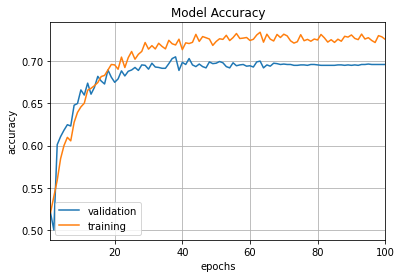

In [27]:
# define CNN model
model4 = cnn_model()

# define SGD optimizer
momentum = 0.8
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history4 = model4.fit(X_train, y_train, 
     validation_data=(X_test, y_test), 
     epochs=epochs, 
     batch_size=batch_size, 
     callbacks=callbacks_list_, 
     verbose=2)

# plot model accuracy
plot_fig(4, history4)

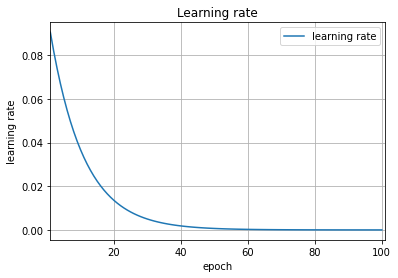

In [28]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history_.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()

plt.close(fig)

# Adaptive gradient descent algorithms : Adagrad, Adadelta, RMSprop, Adam

In [29]:
# fit CNN model using Adagrad optimizer
model5 = cnn_model()
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adadelta optimizer
model6 = cnn_model()
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using RMSprop optimizer
model7 = cnn_model()
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adam optimizer
model8 = cnn_model()
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/100
157/157 - 8s - loss: 0.6918 - accuracy: 0.5288 - val_loss: 0.6826 - val_accuracy: 0.5670 - 8s/epoch - 49ms/step
Epoch 2/100
157/157 - 7s - loss: 0.6843 - accuracy: 0.5457 - val_loss: 0.6800 - val_accuracy: 0.5985 - 7s/epoch - 46ms/step
Epoch 3/100
157/157 - 7s - loss: 0.6770 - accuracy: 0.5744 - val_loss: 0.6677 - val_accuracy: 0.5935 - 7s/epoch - 47ms/step
Epoch 4/100
157/157 - 7s - loss: 0.6724 - accuracy: 0.5852 - val_loss: 0.6649 - val_accuracy: 0.6070 - 7s/epoch - 46ms/step
Epoch 5/100
157/157 - 7s - loss: 0.6691 - accuracy: 0.5893 - val_loss: 0.6598 - val_accuracy: 0.6010 - 7s/epoch - 46ms/step
Epoch 6/100
157/157 - 8s - loss: 0.6670 - accuracy: 0.5944 - val_loss: 0.6575 - val_accuracy: 0.6180 - 8s/epoch - 53ms/step
Epoch 7/100
157/157 - 7s - loss: 0.6618 - accuracy: 0.6068 - val_loss: 0.6540 - val_accuracy: 0.6280 - 7s/epoch - 47ms/step
Epoch 8/100
157/157 - 7s - loss: 0.6621 - accuracy: 0.6042 - val_loss: 0.6499 - val_accuracy: 0.6300 - 7s/epoch - 47ms/step
Epoch 9/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


Epoch 1/100
157/157 - 8s - loss: 0.6904 - accuracy: 0.5300 - val_loss: 0.6905 - val_accuracy: 0.5105 - 8s/epoch - 50ms/step
Epoch 2/100
157/157 - 7s - loss: 0.6794 - accuracy: 0.5724 - val_loss: 0.6619 - val_accuracy: 0.6165 - 7s/epoch - 45ms/step
Epoch 3/100
157/157 - 7s - loss: 0.6628 - accuracy: 0.6017 - val_loss: 0.6403 - val_accuracy: 0.6420 - 7s/epoch - 45ms/step
Epoch 4/100
157/157 - 7s - loss: 0.6457 - accuracy: 0.6273 - val_loss: 0.6321 - val_accuracy: 0.6425 - 7s/epoch - 45ms/step
Epoch 5/100
157/157 - 7s - loss: 0.6326 - accuracy: 0.6447 - val_loss: 0.6191 - val_accuracy: 0.6590 - 7s/epoch - 45ms/step
Epoch 6/100
157/157 - 7s - loss: 0.6152 - accuracy: 0.6605 - val_loss: 0.6156 - val_accuracy: 0.6605 - 7s/epoch - 45ms/step
Epoch 7/100
157/157 - 7s - loss: 0.6087 - accuracy: 0.6669 - val_loss: 0.6017 - val_accuracy: 0.6775 - 7s/epoch - 45ms/step
Epoch 8/100
157/157 - 7s - loss: 0.6017 - accuracy: 0.6776 - val_loss: 0.6062 - val_accuracy: 0.6555 - 7s/epoch - 45ms/step
Epoch 9/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


157/157 - 8s - loss: 0.6777 - accuracy: 0.5663 - val_loss: 0.6637 - val_accuracy: 0.5780 - 8s/epoch - 51ms/step
Epoch 2/100
157/157 - 7s - loss: 0.6571 - accuracy: 0.6147 - val_loss: 0.6497 - val_accuracy: 0.6285 - 7s/epoch - 46ms/step
Epoch 3/100
157/157 - 7s - loss: 0.6381 - accuracy: 0.6398 - val_loss: 0.6273 - val_accuracy: 0.6540 - 7s/epoch - 45ms/step
Epoch 4/100
157/157 - 7s - loss: 0.6180 - accuracy: 0.6651 - val_loss: 0.6071 - val_accuracy: 0.6685 - 7s/epoch - 45ms/step
Epoch 5/100
157/157 - 7s - loss: 0.6033 - accuracy: 0.6784 - val_loss: 0.5986 - val_accuracy: 0.6710 - 7s/epoch - 46ms/step
Epoch 6/100
157/157 - 7s - loss: 0.5932 - accuracy: 0.6814 - val_loss: 0.5935 - val_accuracy: 0.6700 - 7s/epoch - 46ms/step
Epoch 7/100
157/157 - 7s - loss: 0.5801 - accuracy: 0.6960 - val_loss: 0.5839 - val_accuracy: 0.6810 - 7s/epoch - 47ms/step
Epoch 8/100
157/157 - 7s - loss: 0.5778 - accuracy: 0.6934 - val_loss: 0.5936 - val_accuracy: 0.6605 - 7s/epoch - 46ms/step
Epoch 9/100
157/157 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


157/157 - 8s - loss: 0.6809 - accuracy: 0.5585 - val_loss: 0.6541 - val_accuracy: 0.6170 - 8s/epoch - 49ms/step
Epoch 2/100
157/157 - 7s - loss: 0.6444 - accuracy: 0.6364 - val_loss: 0.6259 - val_accuracy: 0.6545 - 7s/epoch - 45ms/step
Epoch 3/100
157/157 - 7s - loss: 0.6224 - accuracy: 0.6545 - val_loss: 0.6118 - val_accuracy: 0.6590 - 7s/epoch - 47ms/step
Epoch 4/100
157/157 - 7s - loss: 0.6047 - accuracy: 0.6705 - val_loss: 0.6004 - val_accuracy: 0.6700 - 7s/epoch - 46ms/step
Epoch 5/100
157/157 - 7s - loss: 0.5970 - accuracy: 0.6781 - val_loss: 0.5928 - val_accuracy: 0.6820 - 7s/epoch - 46ms/step
Epoch 6/100
157/157 - 7s - loss: 0.5801 - accuracy: 0.6940 - val_loss: 0.5850 - val_accuracy: 0.6900 - 7s/epoch - 45ms/step
Epoch 7/100
157/157 - 7s - loss: 0.5796 - accuracy: 0.6906 - val_loss: 0.5812 - val_accuracy: 0.6860 - 7s/epoch - 46ms/step
Epoch 8/100
157/157 - 7s - loss: 0.5679 - accuracy: 0.6967 - val_loss: 0.5823 - val_accuracy: 0.6850 - 7s/epoch - 46ms/step
Epoch 9/100
157/157 

# Compare model accuracy

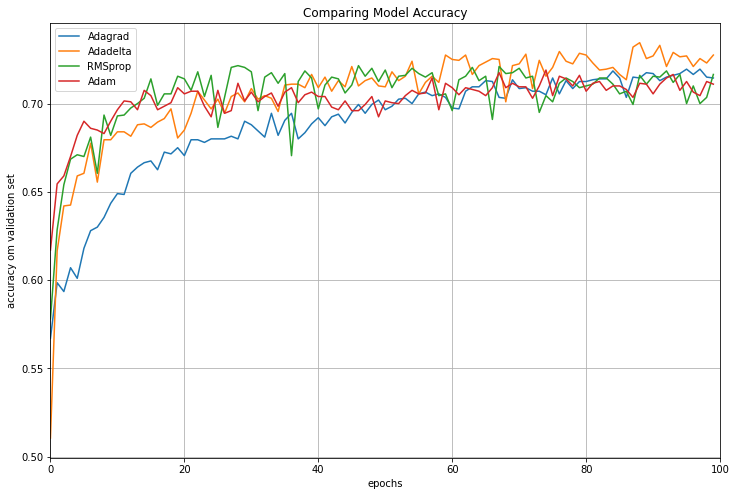

In [31]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history5.history['val_accuracy'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_accuracy'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_accuracy'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_accuracy'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()

plt.close(fig)

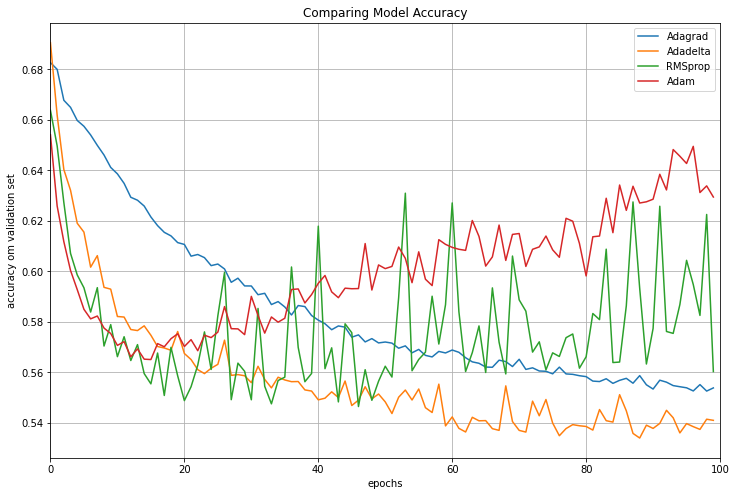

In [32]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history5.history['val_loss'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_loss'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_loss'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_loss'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()

plt.close(fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_accuracy'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_acc'],label='Time-based')
plt.plot(range(epochs),history3.history['val_acc'],label='Step decay')
plt.plot(range(epochs),history4.history['val_acc'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_acc'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_acc'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)